In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
    
def batch(a):    
    
    t = 20
    
    t_span = np.linspace(0,t,100)
    
    V = 100
    
    initial_conditions = [5*V,6*V,0]
    
    k = 0.01
    m = 1
    n = 2
    
    def rates(t,y):
        
        NA,NB,NC = y[0],y[1],y[2]
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA = -k*(CA**m)*(CB**n)
        rB = rA
        rC = -rA
        
        dNA = rA*V
        dNB = rB*V
        dNC = rC*V
    
        return dNA,dNB,dNC
    

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    
    return sol[1][-1]/V

print(batch(2))


1.9185708722947183


In [4]:
def PBR(a):
    
    Q = 10
    CA0, CB0 = 5,6
    FA0 , FB0 = CA0*Q , CB0*Q    
    initial_conditions = [FA0,FB0]    
    
    w = 100
    
    w_span = np.linspace(0,w,100)
    
    k = 0.01
    m = 1
    n = 2


    def steady_PFR(t, y,k):

        F_A, F_B = y
        r_A = -k * (F_A/Q)**m * (F_B/Q)**n
        r_B = r_A

        dFAdV = r_A  
        dFBdV = r_B  

        return [dFAdV, dFBdV]

    solution = solve_ivp(steady_PFR,(0,w),initial_conditions,args =(k,),dense_output = True)
    sol = solution.sol(w_span)
    FA = sol[0][-1]

    return FA/Q

print(PBR(2))


1.4590811837094602


In [5]:
def CSTR(a):
    
    Q = 15   
    
    k = 0.01
    m=1
    n=2
    V  = 100

    FA0, FB0 = 5*Q,6*Q    
    
    def rates(FA,FB):
        
        CA,CB = FA/Q , FB/Q
        
        rA = -k*CA**m*CB**n
        rB = rA
        rC = -rA
        
       
        return rA,rB,rC
    
    
    def solve(var):
        
        FA,FB = var
        
        rA, rB = rates(FA,FB)[0],rates(FA,FB)[1]
        
        eq1 = FA0 - FA + rA*V 
        eq2 = FB0 - FB + rB*V
        
        return eq1,eq2
    
    return fsolve(solve,[FA0,FB0])/Q

print(CSTR(3))

[2.64885377 3.64885377]


(array([  0.,  40.,  80., 120., 160.]), array([0.1823    , 0.1192905 , 0.07262961, 0.03804548, 0.01241387]))
0.010908136500210452


ValueError: could not broadcast input array from shape (3,1) into shape (3,)

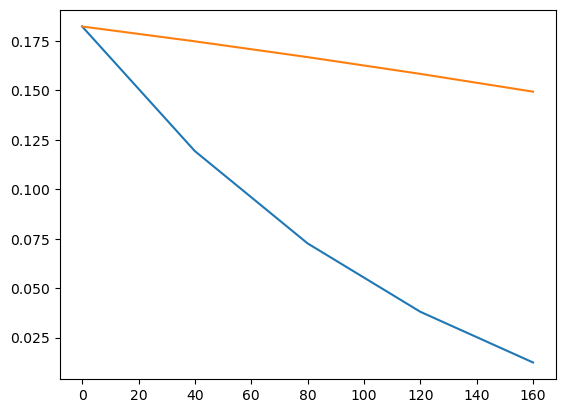

In [11]:
def generate_data(k1):

    
    data_CA = [0.1823,0.1453,0.1216,0.1025,0.0795]
    data_t = [0,36,65,100,160] 
    k2 = -4.54*10**-5
    
    t = 160
    
    t_span = np.linspace(0,t,5)
    
    V = 1
    
    initial_conditions = ([0.1823,0,55])
    
 
    def rates(t,y):
        
        NA,NB,NC= y[0],y[1],y[2]
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA = -k1*CA + k2*CB*CC
        rB = -rA
        rC = -rA

        
        dNA = rA*V
        dNB = rB*V
        dNC = rC*V
     
        return dNA,dNB,dNC
    
    
   

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    
    plt.plot(t_span,sol[0])
    #plt.plot(data_t,data_CA,'o')
    
    return t_span,sol[0]

    
print(generate_data(0.01))    

y_exp = [0.1823,0.1453,0.1216,0.1025,0.0795]
t_exp = [0,36,65,100,160] 

def fitting_function(k1):
    t_generated, y_generated = generate_data(k1)
    # Calculate a fitting metric, such as the sum of squared differences
    fit_metric = np.sum((y_generated - y_exp)**2)
    return fit_metric

print(fitting_function(0.001))

from scipy.optimize import minimize

# Initial guess for k1
initial_k1_guess = ([1.0])

# Optimize k1 to minimize the fitting metric
result = minimize(fitting_function, initial_k1_guess)

# Extract the best-fit value for k1
best_fit_k1 = result.x[0]



In [10]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def generate_data(k1):
    
    t = [1,2,3,4,5]
    y = k1*(np.array(t))
    
    return t,y

print(generate_data(2)) 

def fitting_function(k1):
    # Call the generate_data function to get the y_generated values
    y_generated = generate_data(k1)
    # Calculate a fitting metric, such as the sum of squared differences
    fit_metric = np.sum((y_generated - y_exp)**2)
    return fit_metric

# Experimental data (replace with your actual data)
y_exp = np.array([2,4,6,8,10])
t_exp = np.array([1, 2, 3,4,5])

# Initial guess for k1
initial_k1_guess = 1.0

# Optimize k1 to minimize the fitting metric
result = minimize(fitting_function, initial_k1_guess)

# Extract the best-fit value for k1
best_fit_k1 = result.x[0]

print("Best-fit k1:", best_fit_k1)


([1, 2, 3, 4, 5], array([ 2,  4,  6,  8, 10]))
Best-fit k1: 1.9999999965664288


(array([  0.,  40.,  80., 120., 160.]), array([0.1823    , 0.1192905 , 0.07262961, 0.03804548, 0.01241387]))


ValueError: could not broadcast input array from shape (3,1) into shape (3,)

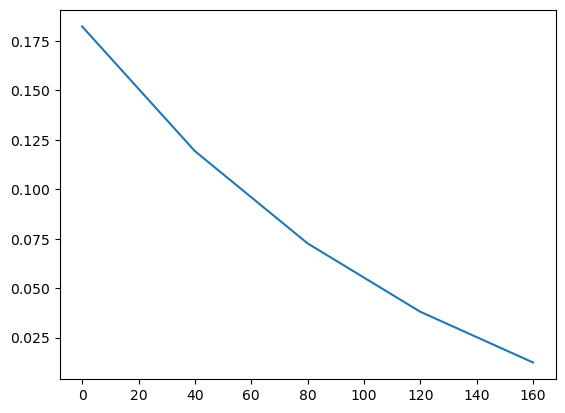

In [3]:
def generate_data(k1):

    
    data_CA = [0.1823,0.1453,0.1216,0.1025,0.0795]
    data_t = [0,36,65,100,160] 
    k2 = -4.54*10**-5
    
    t = 160
    
    t_span = np.linspace(0,t,5)
    
    V = 1
    
    initial_conditions = ([0.1823,0,55])
    
 
    def rates(t,y):
        
        NA,NB,NC= y[0],y[1],y[2]
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA = -k1*CA + k2*CB*CC
        rB = -rA
        rC = -rA

        
        dNA = rA*V
        dNB = rB*V
        dNC = rC*V
     
        return dNA,dNB,dNC
    
    
   

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    
    plt.plot(t_span,sol[0])
    #plt.plot(data_t,data_CA,'o')
    
    return t_span,sol[0]

    
print(generate_data(0.01))    

y_exp = [0.1823,0.1453,0.1216,0.1025,0.0795]
t_exp = [0,36,65,100,160] 

def fitting_function(k1):
    t_generated, y_generated = generate_data(k1)
    # Calculate a fitting metric, such as the sum of squared differences
    fit_metric = np.sum((y_generated - y_exp)**2)
    return fit_metric



from scipy.optimize import fsolve

# Initial guess for k1
initial_k1_guess = ([1.0])

# Optimize k1 to minimize the fitting metric
result = fsolve(fitting_function, initial_k1_guess)

# Extract the best-fit value for k1
best_fit_k1 = result.x[0]
